<a href="https://colab.research.google.com/github/smartie20/smartie20/blob/main/HEART_FAILURE_DNN_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LABS IMPORTION

In [ ]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics,model_selection,preprocessing
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model

#DATASET READING AND EDITING


In [ ]:
#load heart dataset 
data=pd.read_csv('/content/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


##CHECKING FOR NULLS/MISSING VALUES

In [ ]:
#describe a DataFream and info
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


##MAPPING TO CONVERT OBJECTS TO NUMBERS

In [ ]:
#Convert text values to numerical values in (RestingECG,ChestPainType,ExerciseAngina,ST_Slope,Sex)
def convert_text_to_num(x):
  set_x=set(x)
  index_w={}
  w_index={}
  for i,w in enumerate(set_x):
    index_w[i]=w
    w_index[w]=i
  x=x.replace(w_index)
  return x,w_index,index_w 

In [ ]:
data.RestingECG,RestingECG_1_w_index,RestingECG_1_w_index=convert_text_to_num(data.RestingECG)
data.ChestPainType,ChestPainType_1_w_index,ChestPainType_1_w_index=convert_text_to_num(data.ChestPainType)
data.ExerciseAngina,ExerciseAngina_1_w_index,ExerciseAngina_1_w_index=convert_text_to_num(data.ExerciseAngina)
data.ST_Slope,ST_Slope_1_w_index,ST_Slope_1_w_index=convert_text_to_num(data.ST_Slope)
data.Sex,Sex_1_w_index,Sex_1_w_index=convert_text_to_num(data.Sex)

#TARGETS/FEATURES SPECIFICATION

In [ ]:
# Set up X and y variables
x=data.iloc[:,0:11] #Split the data  inputs(features (x))
print('feauter are : ','\n' ,x)

y=data.iloc[:,11:]#split the data output(target(y))
print('target is:','\n' ,y)

feauter are :  
      Age  Sex  ChestPainType  ...  ExerciseAngina  Oldpeak  ST_Slope
0     40    0              3  ...               0      0.0         1
1     49    1              0  ...               0      1.0         0
2     37    0              3  ...               0      0.0         1
3     48    1              1  ...               1      1.5         0
4     54    0              0  ...               0      0.0         1
..   ...  ...            ...  ...             ...      ...       ...
913   45    0              2  ...               0      1.2         0
914   68    0              1  ...               0      3.4         0
915   57    0              1  ...               1      1.2         0
916   57    1              3  ...               0      0.0         0
917   38    0              0  ...               0      0.0         1

[918 rows x 11 columns]
target is: 
      HeartDisease
0               0
1               1
2               0
3               1
4               0
..       

#DOING SOME NECESSARIES

In [ ]:
#defining estimators function with a array to save the models after learning for bars chart ploting 
def print_estimator_name(estimator):
    return estimator.__class__.__name__

In [ ]:
estimators=[] #estimators array
classifiers = [] #classifiers array to save classification models for confusion matrices ploting
scores = [] #scores array for saveing presicion and recall results for comparing
acc=[] #saving accuracy scores for bars chart ploting
f1=[] #saveing f1 score for bars chart ploting

#PREPROCESSING

In [ ]:
x_normalizer=preprocessing.StandardScaler()
x_norm=x_normalizer.fit_transform(x)

#TRAIN - TEST SPLITING

In [ ]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_norm,y,test_size=0.1,random_state=42,stratify=y)
print('x_train :',x_train.shape), print('y_train: ',y_train.shape)
print('x_test :',x_test.shape), print('y_test :',y_test.shape)

x_train : (826, 11)
y_train:  (826, 1)
x_test : (92, 11)
y_test : (92, 1)


(None, None)

#MODELS SELECTION

##1ST MODEL DEEP NEURAL NETWORK

In [ ]:
dnn_model=tf.keras.models.Sequential([
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(units=64,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_1'),
                                  tf.keras.layers.Dropout(0.1),
                                  tf.keras.layers.Dense(units=128,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_2'),
                                  tf.keras.layers.Dropout(0.1),
                                  tf.keras.layers.Dense(units=11,activation=tf.nn.sigmoid,name='output')
                                  ])

In [ ]:
dnn_model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
dnn_model.fit(x=x_train,y=y_train,batch_size=20,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
42/42 [==============================] - 1s 6ms/step - loss: 1.3507 - accuracy: 0.6247 - val_loss: 0.6367 - val_accuracy: 0.9130
Epoch 2/10
42/42 [==============================] - 0s 3ms/step - loss: 0.5140 - accuracy: 0.8220 - val_loss: 0.3052 - val_accuracy: 0.9239
Epoch 3/10
42/42 [==============================] - 0s 3ms/step - loss: 0.4276 - accuracy: 0.8269 - val_loss: 0.3063 - val_accuracy: 0.9348
Epoch 4/10
42/42 [==============================] - 0s 3ms/step - loss: 0.4021 - accuracy: 0.8378 - val_loss: 0.2755 - val_accuracy: 0.9348
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3805 - accuracy: 0.8462 - val_loss: 0.2746 - val_accuracy: 0.9457
Epoch 6/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3765 - accuracy: 0.8438 - val_loss: 0.2724 - val_accuracy: 0.9348
Epoch 7/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3680 - accuracy: 0.8450 - val_loss: 0.2590 - val_accuracy: 0.9457
Epoch 8/10
42/42 [==

In [ ]:
pred=dnn_model.predict(x_test)
tf.argmax(pred,axis=-1)

<tf.Tensor: shape=(92,), dtype=int64, numpy=
array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1])>

###RESULTS AND SCORES MONITORING

In [ ]:
accuracy =metrics.accuracy_score(y_test,np.argmax(pred,-1))
precision =metrics.precision_score(y_test,np.argmax(pred,-1),average='weighted')
recall =metrics.recall_score(y_test,np.argmax(pred,-1),average='weighted')
f1_score =metrics.f1_score(y_test,np.argmax(pred,-1),average='weighted')

In [ ]:
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1_score',f1_score)

accuracy 0.9456521739130435
precision 0.9457357859531773
recall 0.9456521739130435
f1_score 0.9455805179035797


In [ ]:
scores_dict = {"precision": precision, "recall": recall}
scores.append(scores_dict)
acc.append(accuracy)
f1.append(f1_score)
estimators.append(print_estimator_name(dnn_model))

##2ED MODEL SUPPORT VECTOR MACHINE

In [ ]:
SVC=SVC(C=0.5)
SVC.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.5)

In [ ]:
y_pred =SVC.predict(x_test)

###RESULTS AND SCORES MONITORING


In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred,average='weighted')
recall = metrics.recall_score(y_test, y_pred,average='weighted')
f1_score = metrics.f1_score(y_test, y_pred,average='weighted')

In [ ]:
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1_score',f1_score)

accuracy 0.9239130434782609
precision 0.9239339464882943
recall 0.9239130434782609
f1_score 0.9238127250650116


In [ ]:
classifiers.append(SVC)
scores_dict = { "precision": precision, "recall": recall}
scores.append(scores_dict)
acc.append(accuracy)
f1.append(f1_score)
estimators.append(print_estimator_name(SVC))

##3ED MODEL KNEIGHBORS

In [ ]:
KNN= KNeighborsClassifier()
KNN.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
y_pred = KNN.predict(x_test)

###RESULTS AND SCORES MONITORING


In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred,average='weighted')
recall = metrics.recall_score(y_test, y_pred,average='weighted')
f1_score = metrics.f1_score(y_test, y_pred,average='weighted')

In [ ]:
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1_score',f1_score)

accuracy 0.9021739130434783
precision 0.9080812854442344
recall 0.9021739130434783
f1_score 0.9024637165953105


In [ ]:
classifiers.append(KNN)
scores_dict = { "precision": precision, "recall": recall}
scores.append(scores_dict)
acc.append(accuracy)
f1.append(f1_score)
estimators.append(print_estimator_name(KNN))

##4TH MODEL RANDOM FOREST

In [ ]:
rdf = RandomForestClassifier()
rdf = rdf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
y_pred = rdf.predict(x_test)

###RESULTS AND SCORES MONITORING


In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred,average='weighted')
recall = metrics.recall_score(y_test, y_pred,average='weighted')
f1_score = metrics.f1_score(y_test, y_pred,average='weighted')

In [ ]:
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1_score',f1_score)

accuracy 0.9130434782608695
precision 0.9142403169559027
recall 0.9130434782608695
f1_score 0.9132091097308488


In [ ]:
classifiers.append(rdf)
scores_dict = { "precision": precision, "recall": recall}
scores.append(scores_dict)
acc.append(accuracy)
f1.append(f1_score)
estimators.append(print_estimator_name(rdf))

##5TH MODEL LOGISTIC REGRESSION

In [ ]:
model_logis = linear_model.LogisticRegression(C= 0.001, fit_intercept= True, solver='sag')
model_logis.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.001, solver='sag')

In [ ]:
y_pred = model_logis.predict(x_test)

###RESULTS AND SCORES MONITORING


In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred,average='weighted')
recall = metrics.recall_score(y_test, y_pred,average='weighted')
f1_score = metrics.f1_score(y_test, y_pred,average='weighted')

In [ ]:
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1_score',f1_score)

accuracy 0.8913043478260869
precision 0.8967309578293561
recall 0.8913043478260869
f1_score 0.8900330536486143


In [ ]:
classifiers.append(model_logis)
scores_dict = { "precision": precision, "recall": recall}
scores.append(scores_dict)
acc.append(accuracy)
f1.append(f1_score)
estimators.append(print_estimator_name(model_logis))

#STATISTICS

In [ ]:
print('estimators', estimators)
print('='*100)
print('classifiers', classifiers)

estimators ['Sequential', 'SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'LogisticRegression']
classifiers [SVC(C=0.5), KNeighborsClassifier(), RandomForestClassifier(), LogisticRegression(C=0.001, solver='sag')]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

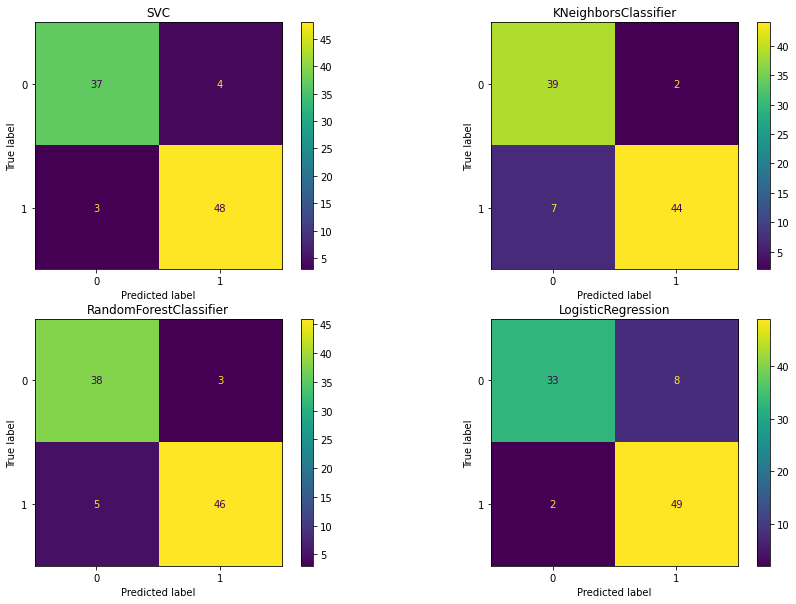

In [ ]:
#ploting confusion matrix for each model for comapring assistant
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          x_test, 
                          y_test, 
                          ax=ax, 
                           )
    ax._textitle.sett(type(cls).__name__)
    

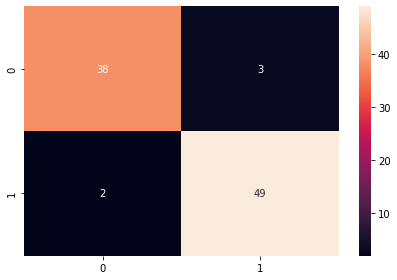

In [ ]:
dnn_matrix=metrics.confusion_matrix(y_test,np.argmax(pred,-1))
sns.heatmap(dnn_matrix, annot=True )
plt.tight_layout()  
plt.show()

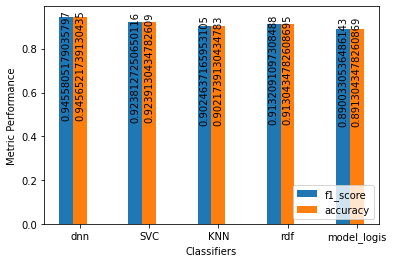

In [ ]:
#presenting accuracy and f1 score for comparing finishing and choosing the best model
estimators=['dnn','SVC','KNN','rdf', 'model_logis']
fig, ax = plt.subplots()
width=0.2
bar_plot1 = ax.bar(np.arange(len(estimators)),f1,width,tick_label=estimators)
bar_plot2 = ax.bar(np.arange(len(estimators))+width,acc,width,tick_label=estimators)

ax.set_xlabel('Classifiers')
ax.set_ylabel('Metric Performance')
ax.legend(('f1_score','accuracy'),loc='lower right')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,height,ha='center', va='bottom', rotation=90)
autolabel(bar_plot1)
autolabel(bar_plot2)
plt.show()

In [ ]:
# calling precision and recall calculations for each model and converting the dictionary to dataframe for easy comparing
scores_df = pd.DataFrame(scores)
scores_df

,precision,recall
0,0.945736,0.945652
1,0.923934,0.923913
2,0.908081,0.902174
3,0.914240,0.913043
4,0.896731,0.891304


**BY COMAPRING PRECISION/RECALL DATAFRAME , MODELS CONFUSION MATRECIS AND BARS CHART PLOT .. WE CAN ASSUME THAT DEEP NEURAL NETWORKS IS THE BEST MODEL TO TRAIN THIS DATASET**